In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from torch.utils.data import DataLoader
from crypto_bot.utils import save_obj, load_obj
from crypto_bot.model.data import get_class_weights, get_scaled_class_weights, get_weighted_random_sampler
from crypto_bot.model.train_loop import Trainer

DATA_FOLDER = 'C:/Users/diego/crypto_bot/data'
WEIGHTS_PATH = 'C:/Users/diego/crypto_bot/data/models'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [4]:
train_ds_name = '{}/data_loaders/train_5m_v1.ds'.format(DATA_FOLDER)
valid_ds_name = '{}/data_loaders/valid_5m_v1.ds'.format(DATA_FOLDER)

# Load
train_dataset = load_obj(train_ds_name)
valid_dataset = load_obj(valid_ds_name)

### Sampler

In [5]:
# Binary
weights = get_class_weights(train_dataset, 2)
# weights = (1.9060870891191019e-06, 2.33737699553561e-05)

# # Multiclass
# # weights = get_class_weights(train_dataset, 3)
# weights = (2.6139690506064407e-05, 6.197937326457755e-06, 2.7187358965575367e-06)

sampler_train = get_weighted_random_sampler(train_dataset, weights)
sampler_valid = get_weighted_random_sampler(valid_dataset, weights)

### DataLoader

In [6]:
train_loader = DataLoader(train_dataset, batch_size=128, num_workers=0, sampler=sampler_train)
valid_loader = DataLoader(valid_dataset, batch_size=128, num_workers=0, sampler=sampler_valid)

# Train model

## Train loop

In [16]:
from crypto_bot.model.model import ConvBotBinary

trainer = Trainer(ConvBotBinary(5), train_loader, valid_loader, 12)
trainer.train()

Using device: cuda:0
Epoch: 1/12 - Train Loss: 0.5975193564754083 - Valid loss 0.6646511826826178
Epoch: 2/12 - 99.35%
Epoch: 2/12 - Train Loss: 0.5925439469724062 - Valid loss 0.6558556945427604
Epoch: 3/12 - Train Loss: 0.5887843225581713 - Valid loss 0.6710025797719541
Epoch: 4/12 - 98.56%
Epoch: 4/12 - Train Loss: 0.5892656019840582 - Valid loss 0.6774080810339554
Epoch: 5/12 - Train Loss: 0.5846915927778678 - Valid loss 0.6630914898022361
Epoch: 6/12 - 97.76%
Epoch: 6/12 - Train Loss: 0.5845107770417316 - Valid loss 0.6529342247092206
Epoch: 7/12 - Train Loss: 0.5850666318519182 - Valid loss 0.677525634350984
Epoch: 8/12 - 96.96%
Epoch: 8/12 - Train Loss: 0.5839802131828559 - Valid loss 0.658678720826688
Epoch: 9/12 - Train Loss: 0.5812361895800586 - Valid loss 0.6556875278120455
Epoch: 10/12 - 96.16%
Epoch: 10/12 - Train Loss: 0.5838443207075872 - Valid loss 0.6601402163505554
Epoch: 11/12 - Train Loss: 0.5832464017003656 - Valid loss 0.6567131747370181
Epoch: 12/12 - 95.36%
Epoc

ConvBotBinary(
  (conv1): Conv1d(5, 32, kernel_size=(3,), stride=(1,), padding=same)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=same)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do): Dropout(p=0.5, inplace=False)
  (conv3): Conv1d(64, 32, kernel_size=(5,), stride=(1,), padding=same)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32, out_features=1, bias=True)
)

## Metrics

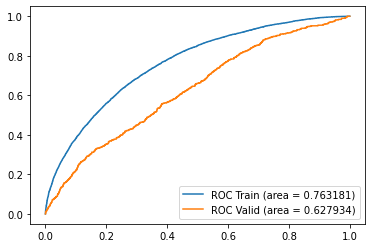

In [17]:
trainer.plot_roc()

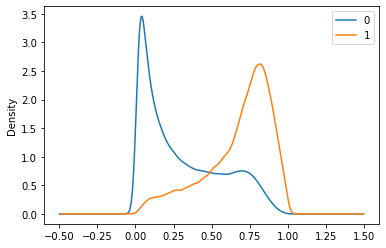

In [95]:
trainer.plot_train_distr()

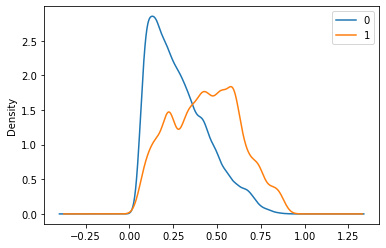

In [45]:
trainer.plot_valid_distr()

In [46]:
trainer.find_threshold()

(0.5750000000000002, 0.6679965307892455)

In [47]:
trainer.print_scores(min_threshold=0.5)

Th: 0.500 Score: 0.625 (9209)
Th: 0.525 Score: 0.640 (7966)
Th: 0.550 Score: 0.647 (6728)
Th: 0.575 Score: 0.668 (5765)
Th: 0.600 Score: 0.653 (4538)
Th: 0.625 Score: 0.664 (3668)
Th: 0.650 Score: 0.668 (2960)
Th: 0.675 Score: 0.712 (2366)
Th: 0.700 Score: 0.757 (1811)
Th: 0.725 Score: 0.799 (1374)
Th: 0.750 Score: 0.816 (946)
Th: 0.775 Score: 0.845 (729)
Th: 0.800 Score: 0.897 (523)
Th: 0.825 Score: 0.924 (342)
Th: 0.850 Score: 0.923 (183)
Th: 0.875 Score: 0.853 (34)
Th: 0.900 Score: 0.846 (13)


## Save model

In [49]:
save_obj(WEIGHTS_PATH + '/net.pickle', trainer.model)

In [59]:
trainer.model(train_dataset[0][0].unsqueeze(0).float())[0].item()

float